In [1]:
import tensorflow as tf
print("Versão do TensorFlow:", tf.__version__)
import keras as K
print("Versão do Keras:", K.__version__)

Versão do TensorFlow: 2.20.0
Versão do Keras: 3.12.0


In [2]:
# Imports
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [3]:
# Inicializando a Rede Neural Convolucional
classifier = Sequential()

In [4]:
# Passo 1 - Primeira Camada de Convolução
#Kernel default: "glorot_uniform"
#32: Representa o número de filtros (ou kernels) nesta camada convolucional.
#(3, 3): Define o tamanho do kernel convolucional (ou filtro)
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu')) #ReLU => f(x) = max (0, x)

c:\Users\Davi Chaves\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Passo 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [6]:
# Adicionando a Segunda Camada de Convolução
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))   #ReLU => f(x) = max (0, x)

In [7]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [8]:
# Passo 3 - Flattening
classifier.add(Flatten())

In [9]:
# Passo 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [10]:
# Compilando a rede
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [11]:
# Criando os objetos train_datagen e validation_datagen com as regras de pré-processamento das imagens
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
#base de treinamento
#cada classe deve estar em uma pasta separada. O nome da pasta é o nome da classe
#dataset_treino = '/content/drive/MyDrive/Compartilhados com outras pessoas/DisciplinasIFTM/ADS/Inteligência Computacional/2025_01/Codigos/dataset/dogs_cats/dataset_treino/'
#base de validação
#dataset_validation = '/content/drive/MyDrive/Compartilhados com outras pessoas/DisciplinasIFTM/ADS/Inteligência Computacional/2025_01/Codigos/dataset/dogs_cats/dataset_validacao/'

#Opcionalmente, a validação é uma técnica usada na aprendizagem profunda para avaliar o desempenho do modelo durante o treinamento. Ele ajuda a detectar possíveis superajustes e subajustes de nossos modelos, e é particularmente útil para otimizar os hiperparâmetros.

#outra opcao, é importar do próprio computador:
#base de treinamento
dataset_treino = '../../datasets/dataset_treino/'
#base de validação
dataset_validation = '../../datasets/dataset_validacao/'

In [13]:
# Pré-processamento das imagens de treino e validação
training_set = train_datagen.flow_from_directory(dataset_treino,
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_set = validation_datagen.flow_from_directory(dataset_validation,
                                                        target_size = (64, 64),
                                                        batch_size = 32,
                                                        class_mode = 'binary')

Found 100 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [14]:
# Executando o treinamento (esse processo pode levar bastante tempo, dependendo do seu computador)
classifier.fit(training_set,
               steps_per_epoch = 80,
               epochs = 5,
               validation_data = validation_set,
               validation_steps = 20)

Epoch 1/5
 4/80 ━━━━━━━━━━━━━━━━━━━━ 9s 129ms/step - accuracy: 0.5037 - loss: 0.7568 

c:\Users\Davi Chaves\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.5000 - loss: 0.7971 - val_accuracy: 0.5000 - val_loss: 0.8150
Epoch 2/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5000 - loss: 0.7794 - val_accuracy: 0.5000 - val_loss: 0.6909
Epoch 3/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5000 - loss: 0.6944 - val_accuracy: 0.5000 - val_loss: 0.6921
Epoch 4/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5200 - loss: 0.6917 - val_accuracy: 0.5000 - val_loss: 0.6883
Epoch 5/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5200 - loss: 0.6894 - val_accuracy: 0.5000 - val_loss: 0.6851


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


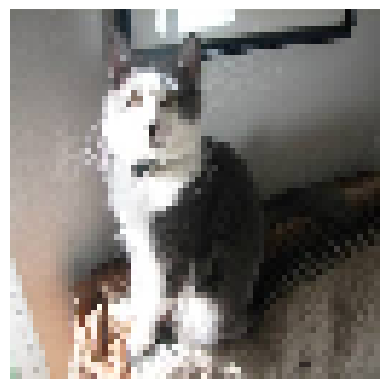

In [19]:
# Primeira Imagem
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt

img = '../../datasets/dataset_teste/cats/2151.jpg'

test_image_orig = image.load_img(img, target_size = (64, 64))
test_image = image.img_to_array(test_image_orig)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices

if int(result[0][0] > 0.5) == 1:
    prediction = 'Cachorro'
else:
    prediction = 'Gato'

# Mostrar com matplotlib
plt.imshow(test_image_orig)
plt.axis('off')
plt.show()

In [20]:
# Previsão da primeira imagem
prediction

'Cachorro'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


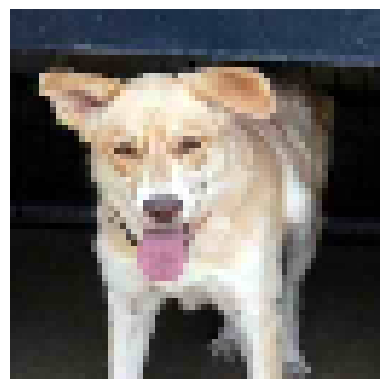

In [22]:
# Segunda Imagem


img2 = '../../datasets/dataset_teste/dogs/2157.jpg'

test_image_orig2 = image.load_img(img2, target_size = (64, 64))
test_image2 = image.img_to_array(test_image_orig2)
test_image2 = np.expand_dims(test_image2, axis = 0)
result2 = classifier.predict(test_image2)
training_set.class_indices

if int(result2[0][0] > 0.5) == 1:
    prediction2 = 'Cachorro'
else:
    prediction2 = 'Gato'

# Mostrar com matplotlib
plt.imshow(test_image_orig2)
plt.axis('off')
plt.show()

In [23]:
# Previsão da segunda imagem
prediction2

'Cachorro'